In [16]:
# Load Libraries
import ast
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rc('font', family='serif', size=11)

# k-Means Analysis of Autoencoder Latent Vectors

## Open latent vector of best model.

In [2]:
# Read data
latent = pd.read_csv('../results/latent_vectors.csv', index_col=[0])
latent.latent_vector = latent.latent_vector.map(lambda x: ast.literal_eval(x))

nSamples = len(latent)
nLSpace = len(latent.latent_vector[0])

print('Samples: {} and Latent Space Dimension: {}'.format(nSamples, nLSpace))

Samples: 219904 and Latent Space Dimension: 3


In [3]:
# Print out top samples
latent.head()

,filename,label,latent_vector
0,/s/chopin/l/grad/stock/data/eastpac2_20x20/eas...,0,"[0.030755937, -2.0434065, 0.7144729]"
1,/s/chopin/l/grad/stock/data/eastpac2_20x20/eas...,0,"[-0.93780327, -0.5560062, 1.2821515]"
2,/s/chopin/l/grad/stock/data/eastpac2_20x20/eas...,0,"[-1.6672546, -0.93520606, 1.18676]"
3,/s/chopin/l/grad/stock/data/eastpac2_20x20/eas...,2,"[-0.5815415, -0.5786667, 0.12116355]"
4,/s/chopin/l/grad/stock/data/eastpac2_20x20/eas...,2,"[0.77450347, -0.05273828, 0.8789349]"


## Plot the latent space in the respective dimension.  
  * 2 dimensions 
  * 3 dimensions at four different angles
  * N dimensions reduced to 2 with PCA and tSNE

In [4]:
plotLSpace = False
if plotLSpace:
    %matplotlib inline

    # if more than 10 colors are needed, use Set3.
    # COLORS = pl.cm.Set3(np.linspace(0, 1, 12))
    COLORS = pl.cm.tab10(np.linspace(0, 1, 10))

    # select only part of data
    nSamples=500
    latent = latent.iloc[:nSamples]
    
    #! 2D plot of latent space by labels
    if length == 2:
    
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
    
        for i, row in latent.iterrows():
            ax.plot(row.latent_vector[0], row.latent_vector[1], 
                    marker='${}$'.format(row.label), c=COLORS[row.label])
    
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()

    #! 3D plot of latent space by labels
    elif length == 3:
    
        fig = plt.figure(figsize=(16, 12))

        for itr in range(4):
            ax = fig.add_subplot(2, 2, itr+1, projection='3d')

            for i, row in latent.iterrows():
                ax.scatter(row.latent_vector[0], row.latent_vector[1], row.latent_vector[2],
                           marker='${}$'.format(row.label), s=45, c=[COLORS[row.label]])

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')

            ax.view_init(elev=10., azim=itr*50)

        plt.tight_layout()
        plt.show()

    #! ND plot of latent space by labels using PCA and tSNE dim reduction
    else:
    
        X = np.stack(latent.latent_vector, axis=0)
        # the output of the NN is normalized using nn.BatchNorm1d()
        # however, we could also standardize with a mean of 0 and std of 1.
        # X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
        components = PCA(n_components=2).fit_transform(X)
        embeded = TSNE(n_components=2).fit_transform(X)
    
        fig = plt.figure(figsize=(12, 5))
        ax = fig.add_subplot(1, 2, 1)

        for i, row in latent.iterrows():
            ax.plot(components[i, 0], components[i, 1], 
                    marker='${}$'.format(row.label), c=COLORS[row.label])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('PCA')

        ax = fig.add_subplot(1, 2, 2)

        for i, row in latent.iterrows():
            ax.plot(embeded[i, 0], embeded[i, 1], 
                    marker='${}$'.format(row.label), c=COLORS[row.label])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('tSNE')

        plt.show()

## Create an interactive 3D plot.

In [5]:
plotLSpace3D = False
if plotLSpace3D:
    if length == 3:
    
        %matplotlib notebook
        COLORS = pl.cm.tab10(np.linspace(0, 1, 10))
        
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        nSamples=500
        latent = latent.iloc[:nSamples]
        for i, row in latent.iterrows():
            ax.scatter(row.latent_vector[0], row.latent_vector[1], row.latent_vector[2],
                       marker='${}$'.format(row.label), s=45, c=[COLORS[row.label]])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

## Select the number of clusters with silhouette analysis.

In [40]:
calcNClusters = True
saveNClusters = True
nClustersPrefix = 'nClusters'

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [7]:
# First pull out latent vector in usable form
if calcNClusters:
    latent.latent_vector = latent.latent_vector.map(lambda x: np.asarray(x))
    latentV = np.asarray([latent.latent_vector[i] 
                          for i in range(len(latent.latent_vector))])

For n_clusters = 2 the average silhouette_score is  0.3611822759173298
For n_clusters = 3 the average silhouette_score is  0.2680066315827553
For n_clusters = 4 the average silhouette_score is  0.27388453659516887
For n_clusters = 5 the average silhouette_score is  0.26153790330222026
For n_clusters = 6 the average silhouette_score is  0.25558131491982156
For n_clusters = 7 the average silhouette_score is  0.2548637734634159
For n_clusters = 8 the average silhouette_score is  0.2571190971033099


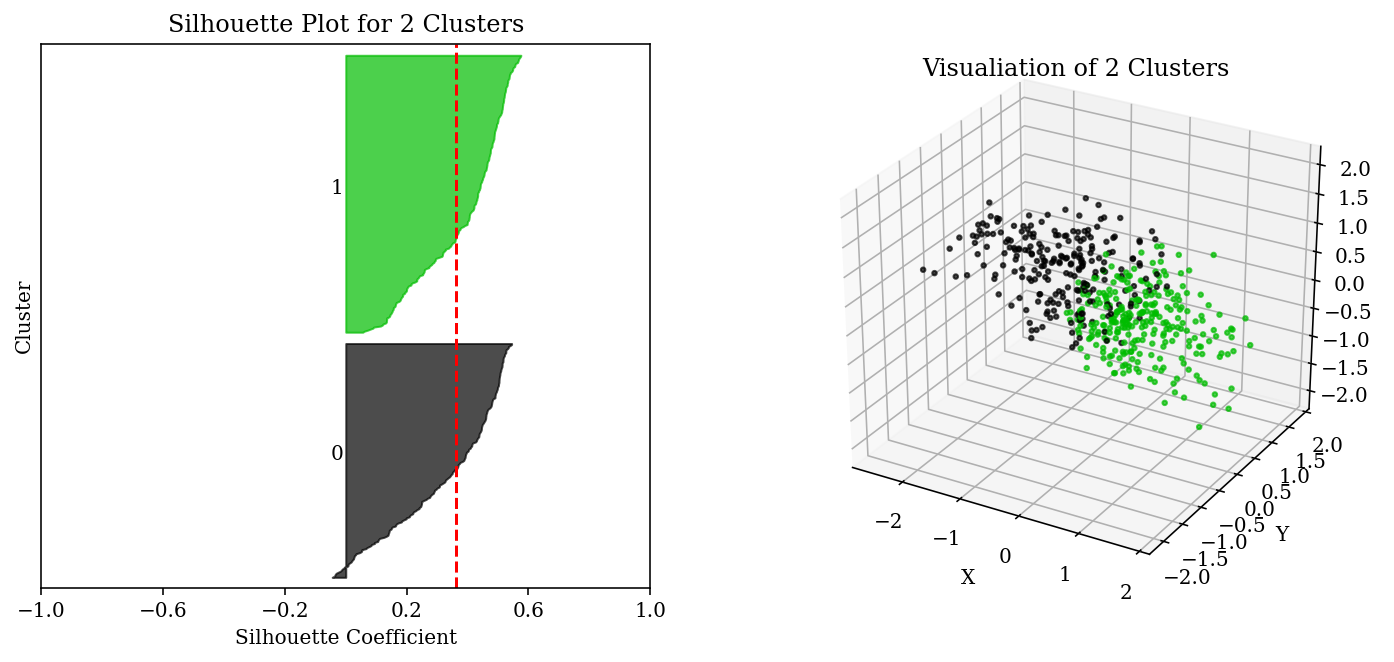

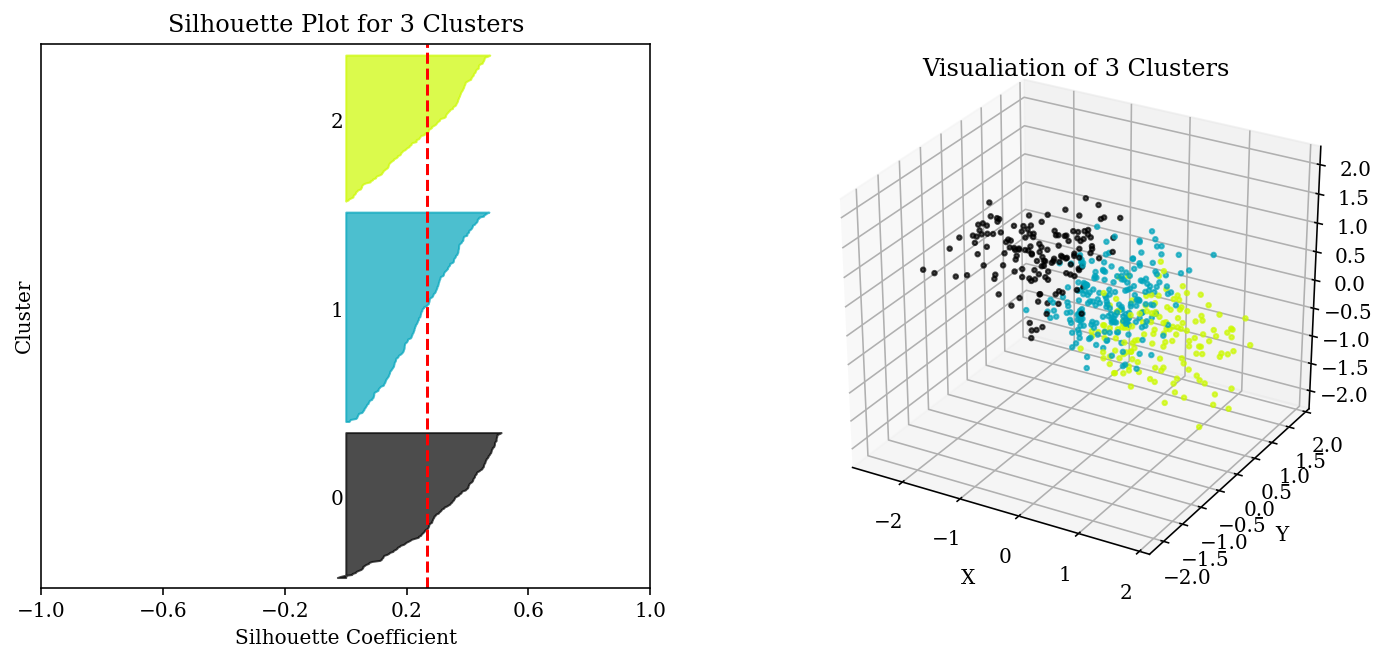

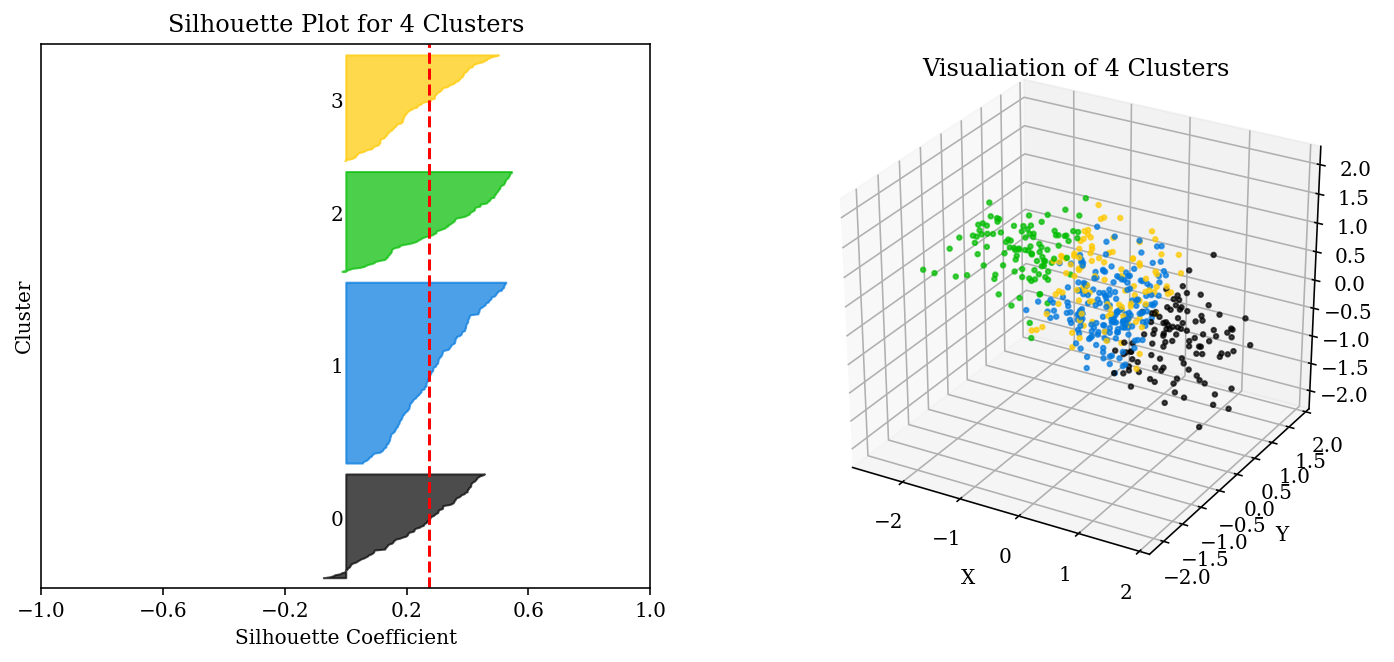

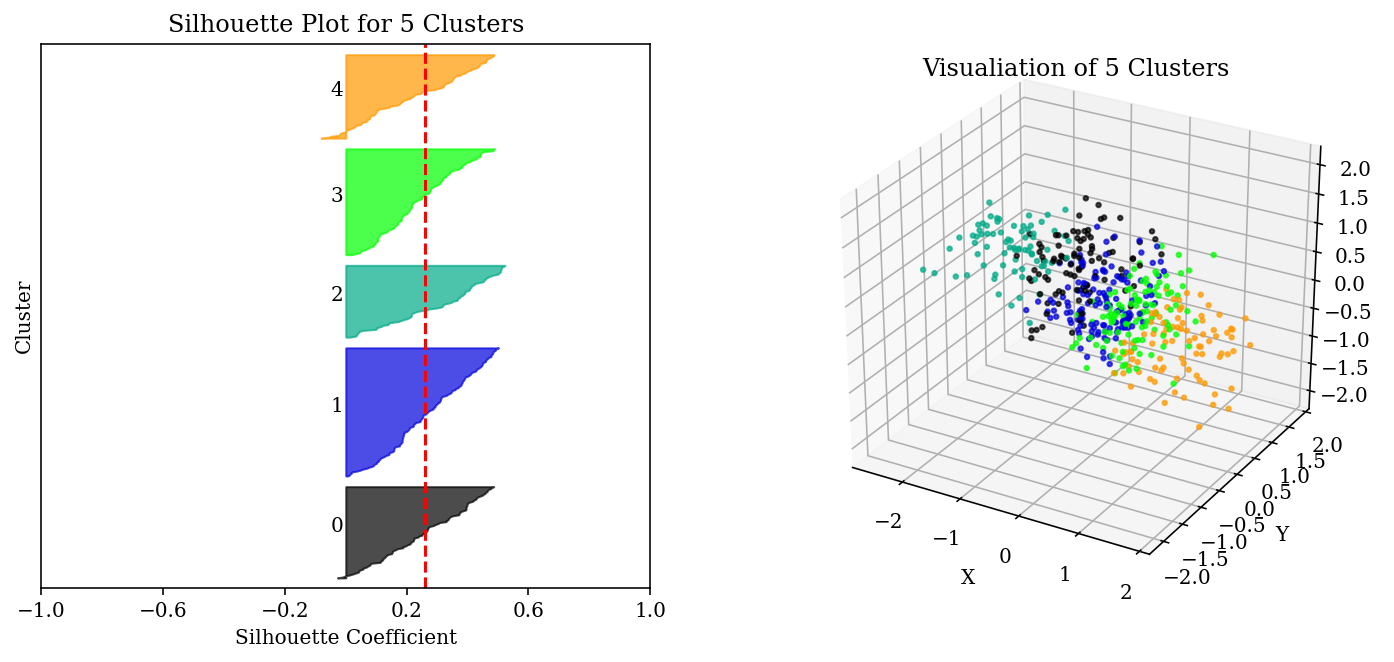

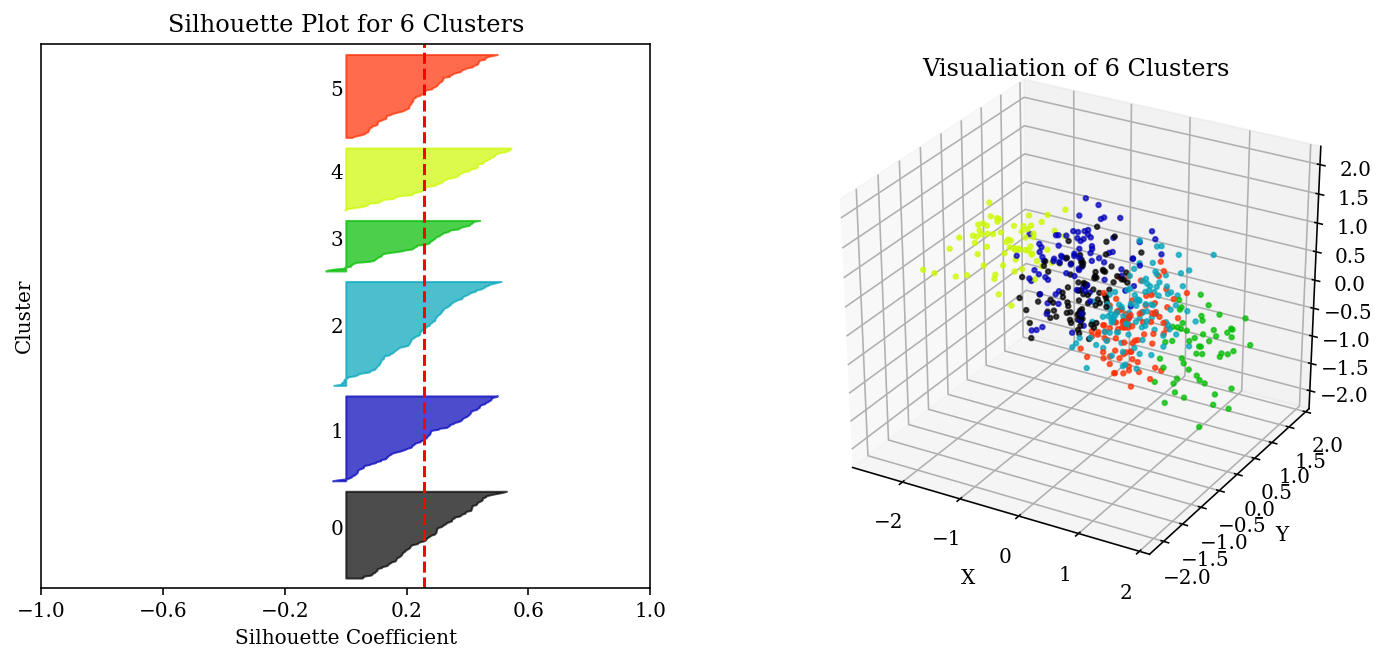

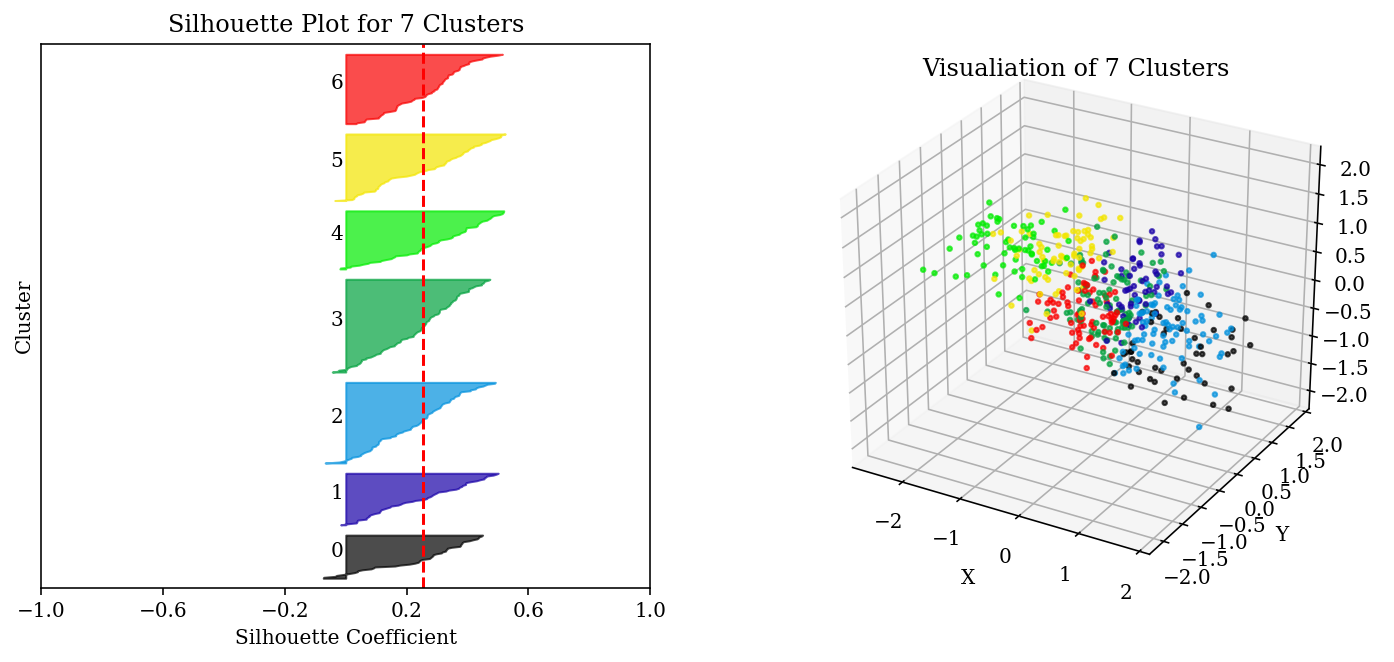

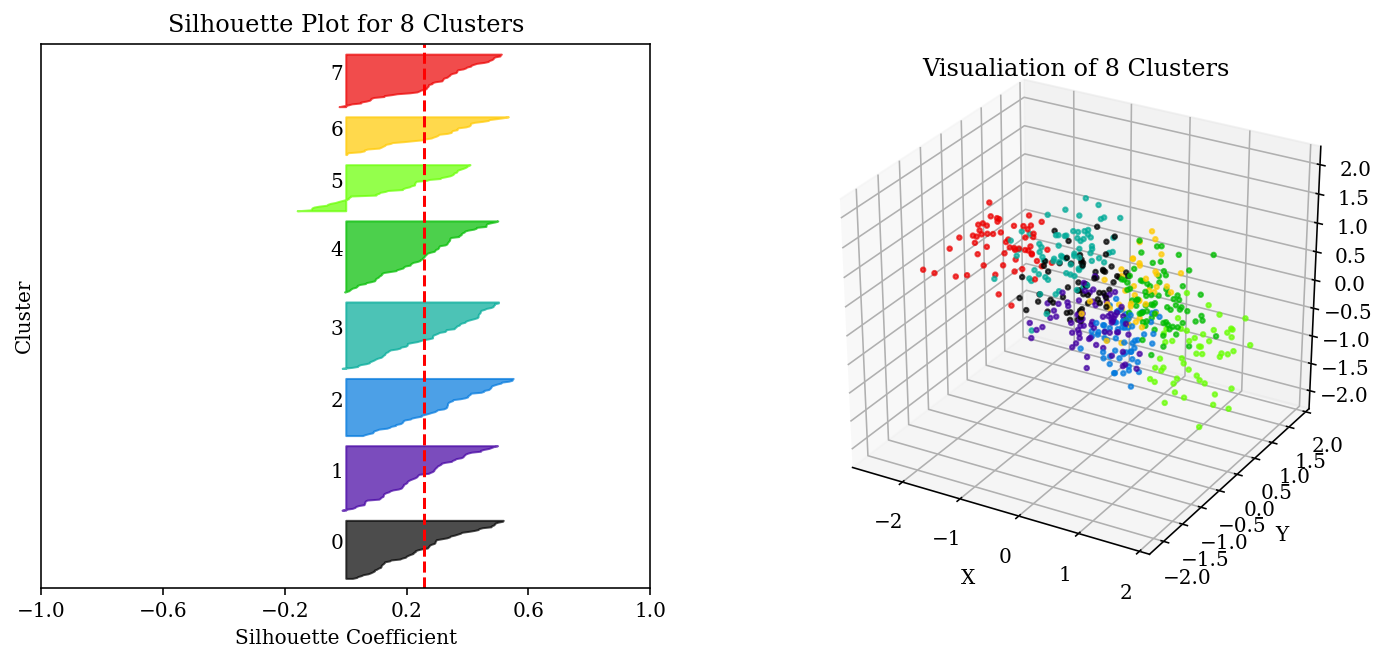

In [43]:
# Perform silhouette analysis
if calcNClusters:
    %matplotlib inline
    
    nReduced = 500
    latentVS = np.empty([nReduced,nLSpace])
    latentVS = latentV[0:nReduced,:]
    COLORS = pl.cm.tab10(np.linspace(0, 1, 10))
    
    for n_clusters in range_n_clusters:
        #Create a subplot with 1 row and 2 columns
        fig = plt.figure(figsize=(12,5))
        ax1 = fig.add_subplot(1, 2, 1)
        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-1,1])
        
        # The (n_clusters+1)*10 is for inserting blank space between 
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(latentVS) + (n_clusters + 1)*10])
        
        # Initialize the clustere with n_clusters value and a random generator
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
        cluster_labels = clusterer.fit_predict(latentVS)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the
        # formed clusters
        silhouette_avg = silhouette_score(latentVS, cluster_labels)
        print("For n_clusters =", n_clusters, 
              "the average silhouette_score is ", silhouette_avg)
        
        # Compute silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(latentVS, cluster_labels)
        
        y_lower=10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to 
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
            
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10
            
        ax1.set_title("Silhouette Plot for {} Clusters".format(n_clusters))
        ax1.set_xlabel("Silhouette Coefficient")
        ax1.set_ylabel("Cluster")
        
        # The vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-1, -0.6, -0.2, 0.2, 0.6, 1])
        
        # 2nd Plot showing actual clusters formed
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(latentVS[:,0], latentVS[:,1], latentVS[:,2],
                    marker='.', alpha=0.7, c=colors, edgecolor=colors)
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('')
        ax2.set_title("Visualiation of {} Clusters".format(n_clusters))

        #ax2.view_init(elev=10., azim=20)
        
        if saveNClusters:
            fileName = nClustersPrefix + str(n_clusters) + '.png'
            plt.savefig(fileName,bbox_inches='tight')
        else:
            plt.show()

In [ ]:
# Define k-Means Model
kmeans = KMeans(n_clusters=2).fit(latentV)

In [ ]:
kmeans.cluster_centers_